In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


from csv import writer


In [2]:
import pandas as pd
df=pd.read_csv('loan_data_9578.csv')
df.rename(columns=lambda x: x.strip(), inplace=True)
df.columns = df.columns.str.strip()
#df['education'] = df['education'].str.strip()
#df['self_employed'] = df['self_employed'].str.strip()
#df['loan_status'] = df['loan_status'].str.strip()
#df.drop(columns=['loan_id'], inplace=True)
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

In [5]:
# List of features to analyze
features_to_analyze = ['inq.last.6mths', 'delinq.2yrs', 'pub.rec']

# Loop through each feature
for feature in features_to_analyze:
    # Get unique values and their counts
    unique_values_counts = df[feature].value_counts()

    # Calculate the percentage per unique value
    percentages = (unique_values_counts / unique_values_counts.sum()) * 100

    # Sort the unique values in ascending order
    unique_values_counts = unique_values_counts.sort_index()
    percentages = percentages.sort_index()

    # Print the results
    print(f"Feature: {feature}")
    print("Unique Values\tCounts\tPercentage")
    for value, count, percentage in zip(unique_values_counts.index, unique_values_counts, percentages):
        print(f"{value}\t\t{count}\t\t{percentage:.2f}%")
    print("\n")

Feature: inq.last.6mths
Unique Values	Counts	Percentage
0		3637		37.97%
1		2462		25.70%
2		1384		14.45%
3		864		9.02%
4		475		4.96%
5		278		2.90%
6		165		1.72%
7		100		1.04%
8		72		0.75%
9		47		0.49%
10		23		0.24%
11		15		0.16%
12		15		0.16%
13		6		0.06%
14		6		0.06%
15		9		0.09%
16		3		0.03%
17		2		0.02%
18		4		0.04%
19		2		0.02%
20		1		0.01%
24		2		0.02%
25		1		0.01%
27		1		0.01%
28		1		0.01%
31		1		0.01%
32		1		0.01%
33		1		0.01%


Feature: delinq.2yrs
Unique Values	Counts	Percentage
0		8458		88.31%
1		832		8.69%
2		192		2.00%
3		65		0.68%
4		19		0.20%
5		6		0.06%
6		2		0.02%
7		1		0.01%
8		1		0.01%
11		1		0.01%
13		1		0.01%


Feature: pub.rec
Unique Values	Counts	Percentage
0		9019		94.16%
1		533		5.56%
2		19		0.20%
3		5		0.05%
4		1		0.01%
5		1		0.01%




In [6]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'education' column
df['purpose'] = label_encoder.fit_transform(df['purpose'])

# Apply label encoding to the 'self_employed' column
#df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
#df['self_employed'] = df['self_employed'].replace(['Yes', 'No'], [1,0])

# Apply label encoding to the 'loan_status' column
#df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
#df['loan_status'] = df['loan_status'].replace(['Approved', 'Rejected'], [1,0])

# Display the updated DataFrame with encoded columns
print(df[['purpose']])

      purpose
0           2
1           1
2           2
3           2
4           1
...       ...
9573        0
9574        0
9575        2
9576        4
9577        2

[9578 rows x 1 columns]


In [7]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [8]:
#df['cibil_grp'] = np.where((df['cibil_score']>=300) & (df['cibil_score']<=500),"1",
#                           np.where((df['cibil_score']>500)& (df['cibil_score']<600),"2","3"))

In [9]:
# Define the feature columns (X) and target column (y)
y = df['not.fully.paid']  # Target variable
x = df.drop(columns=['not.fully.paid'])  # Drop 'loan_status' column to get feature columns
x[x < 0]=0
x

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0


In [10]:
#Univariate Selection
from sklearn.feature_selection import SelectKBest, chi2
select_feature = SelectKBest(chi2, k=7).fit(x, y)
selected_features_df = pd.DataFrame({'Feature':list(x.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
8,revol.bal,1.860498e+06
7,days.with.cr.line,1.119078e+04
3,installment,3.211572e+03
9,revol.util,1.160848e+03
10,inq.last.6mths,6.564686e+02
6,fico,4.351062e+02
5,dti,5.025229e+01
0,credit.policy,4.670311e+01
1,purpose,3.217312e+01
12,pub.rec,2.505498e+01


In [11]:
#x = x.drop(columns=['log.annual.inc'])

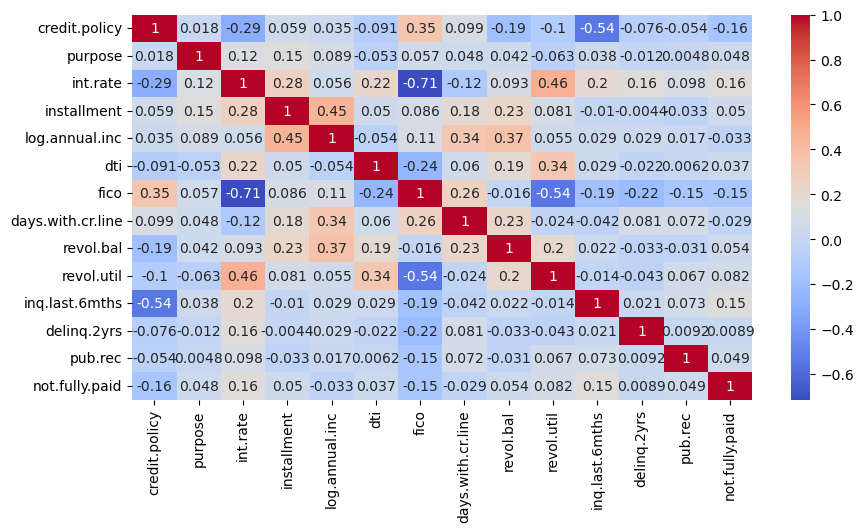

In [12]:
# Get the data types of each column
column_types = df.dtypes

# Select only the numeric columns (assuming 'df' is your DataFrame)
numeric_columns = df.select_dtypes(include=[np.number])

# Create a correlation matrix for the numeric columns
c = numeric_columns.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(c, cmap="coolwarm", annot=True)
plt.show()

In [13]:
import numpy as np
class WOE_Encoder():
    def __init__(self, cols=None, size=None):
            self.cols = cols
            self.min_samples=1
            #self.bins=10000
            self.bins=int(size/5)
            self._mapping = {}
            
    def WOE_fit(self, X, y):
        for col in self.cols:
            X[col]=X[col].fillna(-9999)
            if (len(np.unique(X[col]))>100):
                binned_x = pd.qcut(X[col], self.bins,  duplicates='drop')
                d0 = pd.DataFrame({'x': binned_x, 'y':y})
            else:
                d0 = pd.DataFrame({'x': X[col], 'y': y})
            #print (d0)
            # Share of positive (resp. negative) labels for each category P(X=X_i | Y=1) (resp. P(X=X_i | Y=0))
            #mapping = y.groupby(X[col]).agg(['sum', 'count']).rename({'sum': 'pos'}, axis=1)
            mapping = y.groupby(d0["x"]).agg(['sum', 'count']).rename({'sum': 'pos'}, axis=1)
            mapping['neg'] = mapping['count'] - mapping['pos']
            mapping[['pos', 'neg']] /= mapping[['pos', 'neg']].sum()
            # For corner cases, defaulting to WOE = 0 (meaning no info). To avoid division by 0 we use default values.
            #undef = (mapping['count'] < self.min_samples) | (mapping['pos'] == 0) | (mapping['neg'] == 0)
            #mapping.loc[undef, ['pos', 'neg']] = -1
            # Final step, log of ratio of probabily estimates
            mapping['value'] = np.log((mapping['pos'] +0.0001)/ (mapping['neg']+0.0001))
            self._mapping[col] = mapping
            

        X_encoded = X.copy(deep=True)
        for col, mapping in self._mapping.items():
            X_encoded.loc[:, col] = X_encoded[col].fillna(-9999).map(mapping['value'])
            X_encoded[col].fillna(0, inplace=True)
             
        return X_encoded 

In [14]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()



# Select only the numerical columns for scaling (excluding 'loan_status')
#numerical_columns = [ 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
#                      'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
#                      'bank_asset_value']


numerical_columns = [ 'int.rate', 'installment', 'log.annual.inc', 'dti',
                      'fico', 'days.with.cr.line', 'revol.bal',
                      'revol.util']


num_df = x.select_dtypes(include=['float64', 'int64', 'int32']).copy()
cat_df = x.select_dtypes(include=['object']).copy()
categorical_cols = cat_df.columns.tolist()
numerical_columns=num_df.columns.tolist()
all_columns=x.columns.tolist()
print(all_columns)
print(numerical_columns)


# Apply scaling to the numerical columns
#x[numerical_columns] = scaler.fit_transform(x[numerical_columns])


# Display the scaled feature variables (X) and the target variable (y)
#print("Scaled Feature Variables (x):")
#print(x.head())

#from mlencoders.weight_of_evidence_encoder import WeightOfEvidenceEncoder

#enc = WeightOfEvidenceEncoder(cols=numerical_columns)
#x[numerical_columns] = enc.fit_transform(x[numerical_columns], y)
#x.head()

columns_for_trans=all_columns

#columns_for_trans=['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

Obj = WOE_Encoder(cols=columns_for_trans, size=x[columns_for_trans].shape[0])
x[columns_for_trans] = Obj.WOE_fit(x[columns_for_trans], y)

 

# Display the scaled feature variables (X) and the target variable (y)
print("aWOE Feature Variables (x):")
print(x.head())


['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
aWOE Feature Variables (x):
   credit.policy   purpose  int.rate  installment  log.annual.inc       dti  \
0      -0.229752 -0.058153 -0.161515     0.230899       -0.154453 -1.976168   
1      -0.229752 -0.375747  0.410115    -1.976168       -0.309353 -0.374811   
2      -0.229752 -0.058153 -0.227686     0.230899       -0.807818 -1.553719   
3      -0.229752 -0.058153  0.267251     0.464267       -0.154453  0.507242   
4      -0.229752 -0.375747  0.099015    -1.787087        0.230899  0.507242   

       fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  0.021241           0.666192   0.230899    0.631011       -0

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state=0)

priors: None
var_smoothing: 0.2154434690031884
[[1490  121]
 [  22  283]]


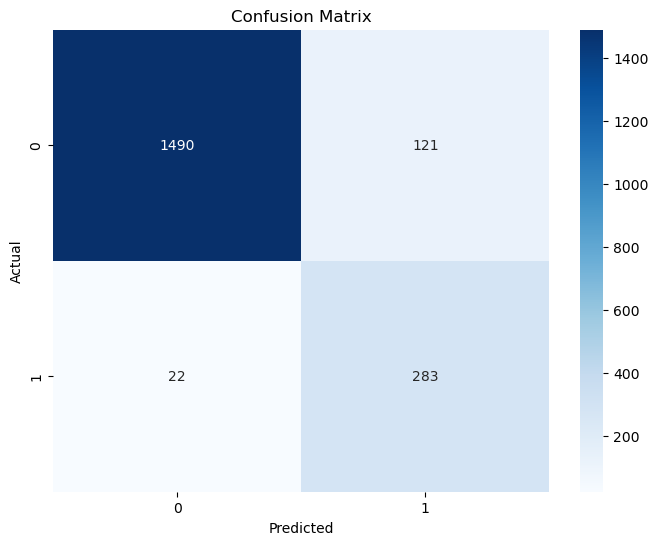

GaussianNB Classifier Metrics:
AUC: 0.9263801121388813
Accuracy: 0.925365344467641
Precision: 0.9400889947330552
Recall: 0.925365344467641
Specificity: 0.9273948798101217
F1 Score: 0.9293931155358058
classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      1611
           1       0.70      0.93      0.80       305

    accuracy                           0.93      1916
   macro avg       0.84      0.93      0.88      1916
weighted avg       0.94      0.93      0.93      1916

----------------------------------
1490 121 22 283
pod:  0.9278688524590164
pof:  0.07510862818125388
AUC:  0.9263801121388813
accuracy:  0.925365344467641
precision:  0.7004950495049505
recall:  0.9278688524590164
specificity:  0.9248913718187461
F1:  0.7983074753173484


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a GaussianNB instance
gaussian_nb = GaussianNB(var_smoothing=0.2154434690031884)

params = gaussian_nb.get_params()

# Print all parameter values
for param, value in params.items():
    print(f"{param}: {value}")
    
    
# Train the logistic regression model
gaussian_nb.fit(x_train, y_train)

# Predict on the test set
y_pred = gaussian_nb.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

 

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("GaussianNB Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("classification Report:\n", classification_rep)

print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'aWOE', 'NB', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


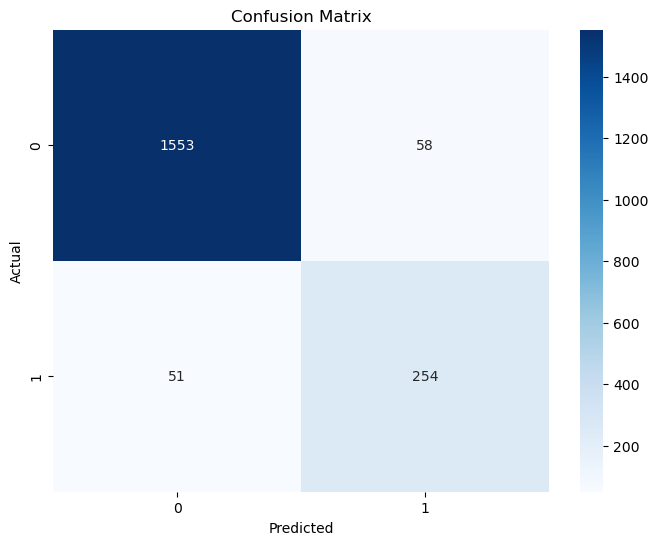

LogisticRegression Classifier Metrics:
AUC: 0.8983922011580221
Accuracy: 0.9431106471816284
Precision: 0.9436736500379584
Recall: 0.9431106471816284
Specificity: 0.853673755134416
F1 Score: 0.9433714258377845
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1611
           1       0.81      0.83      0.82       305

    accuracy                           0.94      1916
   macro avg       0.89      0.90      0.89      1916
weighted avg       0.94      0.94      0.94      1916

----------------------------------
1553 58 51 254
pod:  0.8327868852459016
pof:  0.03600248292985723
AUC:  0.8983922011580221
accuracy:  0.9431106471816284
precision:  0.8141025641025641
recall:  0.8327868852459016
specificity:  0.9639975170701428
F1:  0.8233387358184764


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a LogisticRegression instance
#logistic_reg = LogisticRegression(random_state=42)
#logistic_reg = LogisticRegression(C=100, penalty='l1', solver='liblinear')
logistic_reg = LogisticRegression(C=1, multi_class='ovr', penalty='l1', solver='liblinear')

# Print all parameter
print(logistic_reg.get_params())

# Train the logistic regression model
logistic_reg.fit(x_train, y_train)

# Predict on the test set
y_pred = logistic_reg.predict(x_test)



# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

 

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("LogisticRegression Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 

# Print the classification report
print("Classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'aWOE', 'LR', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

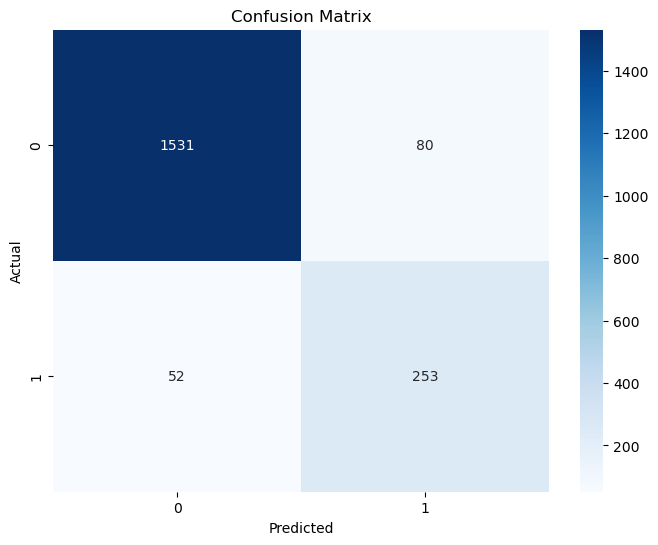

Decision Tree Classifier Metrics:
AUC: 0.8899247997883404
Accuracy: 0.9311064718162839
Precision: 0.9341372412019964
Recall: 0.9311064718162839
Specificity: 0.848743127760397
F1 Score: 0.9323162666375525
classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1611
           1       0.76      0.83      0.79       305

    accuracy                           0.93      1916
   macro avg       0.86      0.89      0.88      1916
weighted avg       0.93      0.93      0.93      1916

----------------------------------
1531 80 52 253
pod:  0.8295081967213115
pof:  0.04965859714463067
AUC:  0.8899247997883404
accuracy:  0.9311064718162839
precision:  0.7597597597597597
recall:  0.8295081967213115
specificity:  0.9503414028553694
F1:  0.7931034482758621


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DecisionTreeClassifier instance
#decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)


# Train the decision tree model
decision_tree.fit(x_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Decision Tree Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'aWOE', 'DTree', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


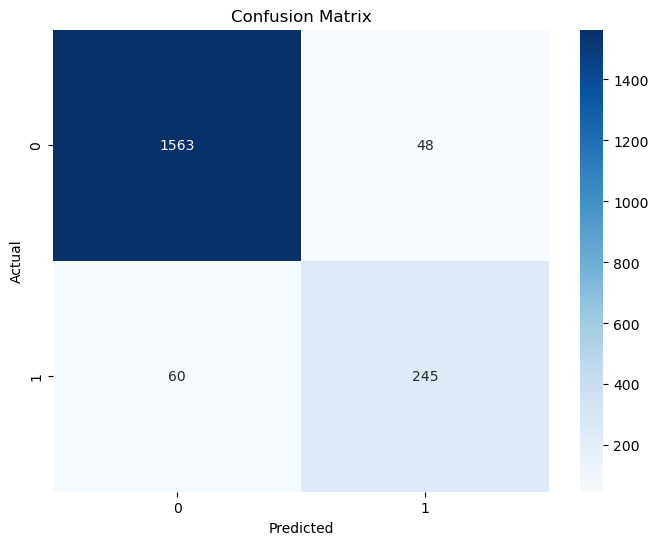

RandomForest Classifier Metrics:
AUC: 0.886741765118906
Accuracy: 0.9436325678496869
Precision: 0.9428380754766964
Recall: 0.9436325678496869
Specificity: 0.8298509623881248
F1 Score: 0.9431715861259812
classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1611
           1       0.84      0.80      0.82       305

    accuracy                           0.94      1916
   macro avg       0.90      0.89      0.89      1916
weighted avg       0.94      0.94      0.94      1916

----------------------------------
1563 48 60 245
pod:  0.8032786885245902
pof:  0.0297951582867784
AUC:  0.8867417651189059
accuracy:  0.9436325678496869
precision:  0.8361774744027304
recall:  0.8032786885245902
specificity:  0.9702048417132216
F1:  0.8193979933110368


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a RandomForestClassifier instance
#random_forest = RandomForestClassifier(random_state=42)
random_forest = RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300)
 

print(random_forest.get_params())

# Train the random forest model
random_forest.fit(x_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("RandomForest Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'aWOE', 'RF', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


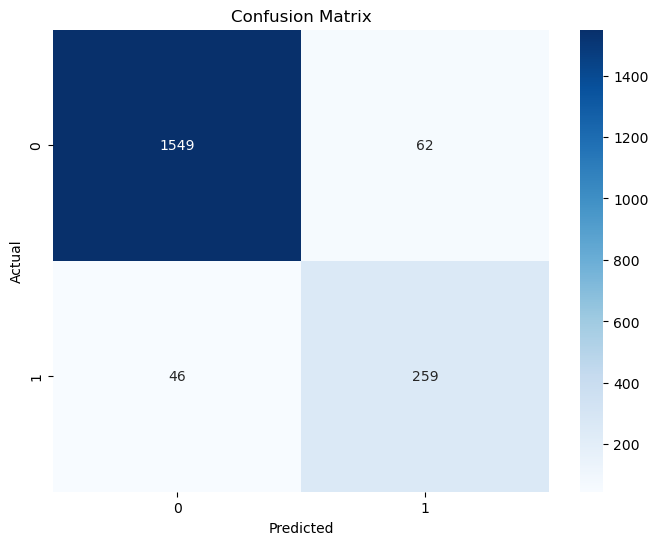

SVC Classifier Metrics:
AUC: 0.905347457540882
Accuracy: 0.9436325678496869
Precision: 0.9450046454451242
Recall: 0.9436325678496869
Specificity: 0.8670623472320769
F1 Score: 0.9442122635677704
classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1611
           1       0.81      0.85      0.83       305

    accuracy                           0.94      1916
   macro avg       0.89      0.91      0.90      1916
weighted avg       0.95      0.94      0.94      1916

----------------------------------
1549 62 46 259
pod:  0.8491803278688524
pof:  0.038485412787088766
AUC:  0.9053474575408819
accuracy:  0.9436325678496869
precision:  0.8068535825545171
recall:  0.8491803278688524
specificity:  0.9615145872129113
F1:  0.8274760383386582


In [20]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create an SVC (Support Vector Classification) instance
#svm_classifier = SVC(random_state=42)
svm_classifier = SVC(C=1)


print(svm_classifier.get_params())

# Train the SVM model
svm_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("SVC Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'aWOE', 'SVM', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


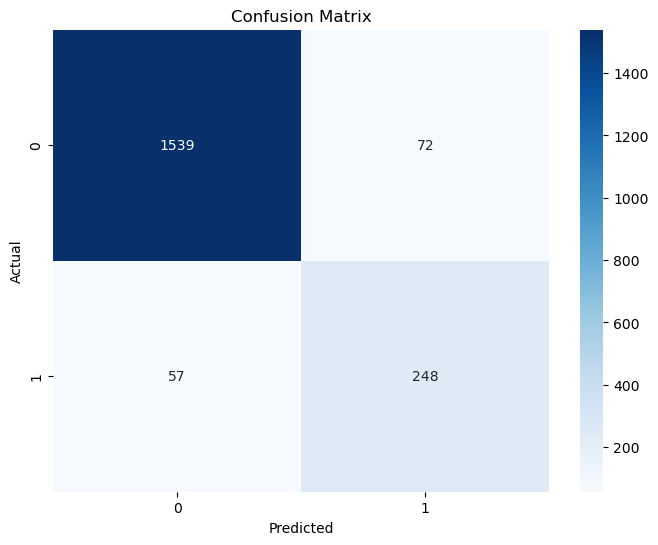

KNeighbors Classifier Metrics:
AUC: 0.8842110083340966
Accuracy: 0.9326722338204593
Precision: 0.9341541157172681
Recall: 0.9326722338204593
Specificity: 0.8357497828477337
F1 Score: 0.9333227119954848
KNeighbors Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1611
           1       0.78      0.81      0.79       305

    accuracy                           0.93      1916
   macro avg       0.87      0.88      0.88      1916
weighted avg       0.93      0.93      0.93      1916

----------------------------------
1539 72 57 248
pod:  0.8131147540983606
pof:  0.0446927374301676
AUC:  0.8842110083340966
accuracy:  0.9326722338204593
precision:  0.775
recall:  0.8131147540983606
specificity:  0.9553072625698324
F1:  0.7936


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KNeighborsClassifier instance with a specified number of neighbors (e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
#knn_classifier = KNeighborsClassifier(metric='euclidean', n_neighbors=27)

print(knn_classifier.get_params())

# Train the KNN model
knn_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("KNeighbors Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("KNeighbors Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'aWOE', 'KNN', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


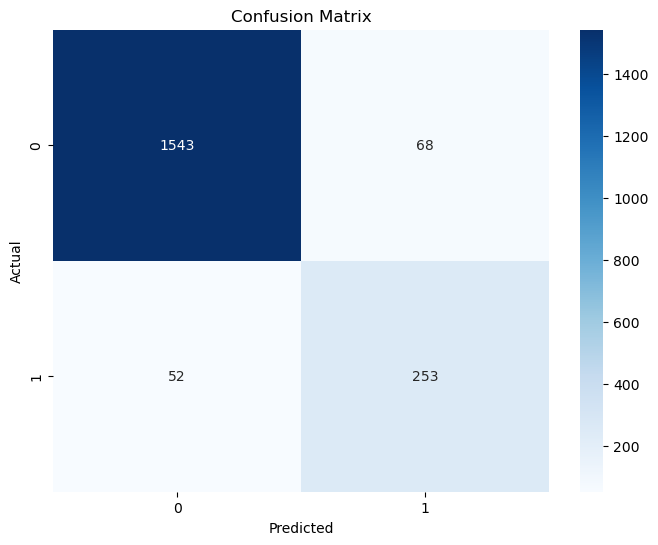

GradientBoosting Classifier Metrics:
AUC: 0.8936491945741878
Accuracy: 0.9373695198329853
Precision: 0.9388662724455348
Recall: 0.9373695198329853
Specificity: 0.8499288693153901
F1 Score: 0.9380136261864118
GradientBoostingClassifier Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1611
           1       0.79      0.83      0.81       305

    accuracy                           0.94      1916
   macro avg       0.88      0.89      0.89      1916
weighted avg       0.94      0.94      0.94      1916

----------------------------------
1543 68 52 253
pod:  0.8295081967213115
pof:  0.04220980757293606
AUC:  0.8936491945741877
accuracy:  0.9373695198329853
precision:  0.7881619937694704
recall:  0.8295081967213115
specificity:  0.957790192427064
F1:  0.8083067092651758


In [22]:
 # Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
 
# Initialize GradientBoosting classifier
#gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
#gb_clf = GradientBoostingClassifier(min_samples_leaf=2, n_estimators=50)
#gb_clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=50)



print(gb_clf.get_params())

# Train GradientBoosting classifier
gb_clf.fit(x_train, y_train)
  

# Predict on the test set
y_pred = gb_clf.predict(x_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("GradientBoosting Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("GradientBoostingClassifier Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'aWOE', 'GB', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


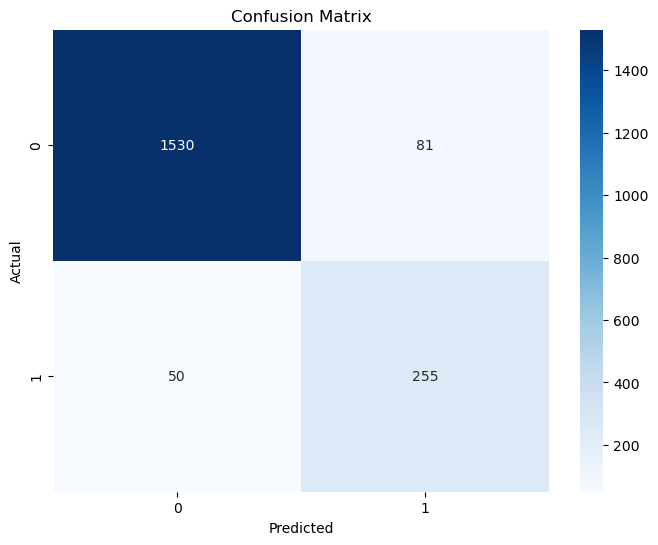

XGB Classifier Metrics:
AUC: 0.8928931220807766
Accuracy: 0.9316283924843424
Precision: 0.9350168066949304
Recall: 0.9316283924843424
Specificity: 0.8541578516772109
F1 Score: 0.9329495750551825
  Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1611
           1       0.76      0.84      0.80       305

    accuracy                           0.93      1916
   macro avg       0.86      0.89      0.88      1916
weighted avg       0.94      0.93      0.93      1916

----------------------------------
1530 81 50 255
pod:  0.8360655737704918
pof:  0.05027932960893855
AUC:  0.8928931220807766
accuracy:  0.9316283924843424
precision:  0.7589285714285714
recall:  0.8360655737704918
specificity:  0.9497206703910615
F1:  0.7956318252730109


In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create an XGBClassifier instance
xgb_classifier = XGBClassifier(random_state=42)

print(xgb_classifier.get_params())

# Train the XGBoost model
xgb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(x_test)


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("XGB Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("  Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'aWOE', 'XGB', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

In [24]:
import tensorflow as tf
print(tf.__version__)

2.14.0


Epoch 1/10
613/613 [==============================] - 3s 3ms/step - loss: 0.1729 - accuracy: 0.9227 - val_loss: 0.1468 - val_accuracy: 0.9341
Epoch 2/10
613/613 [==============================] - 2s 2ms/step - loss: 0.1431 - accuracy: 0.9364 - val_loss: 0.1529 - val_accuracy: 0.9367
Epoch 3/10
613/613 [==============================] - 2s 3ms/step - loss: 0.1367 - accuracy: 0.9431 - val_loss: 0.1389 - val_accuracy: 0.9426
Epoch 4/10
613/613 [==============================] - 2s 2ms/step - loss: 0.1309 - accuracy: 0.9466 - val_loss: 0.1275 - val_accuracy: 0.9504
Epoch 5/10
613/613 [==============================] - 2s 3ms/step - loss: 0.1273 - accuracy: 0.9463 - val_loss: 0.1295 - val_accuracy: 0.9446
Epoch 6/10
613/613 [==============================] - 2s 3ms/step - loss: 0.1251 - accuracy: 0.9463 - val_loss: 0.1305 - val_accuracy: 0.9498
Epoch 7/10
60/60 [==============================] - 0s 1ms/step


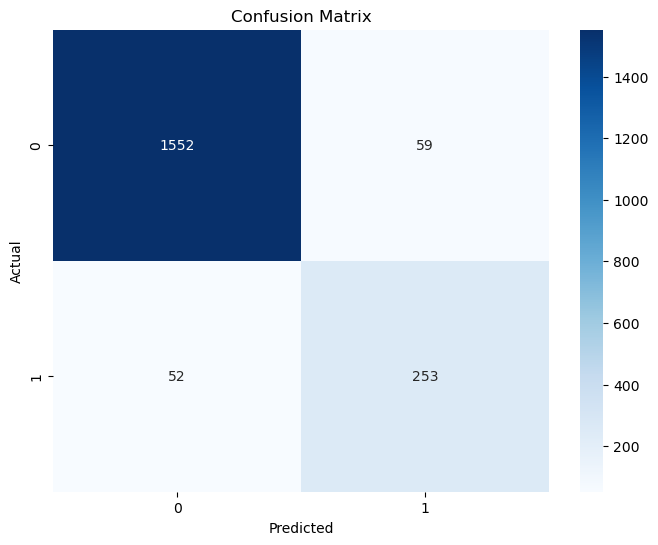

FNN   Metrics:
AUC: 0.8964424906635732
Accuracy: 0.9420668058455115
Precision: 0.9426392407517686
Recall: 0.9420668058455115
Specificity: 0.850818175481635
F1 Score: 0.9423323694311385
GaussianNB Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1611
           1       0.81      0.83      0.82       305

    accuracy                           0.94      1916
   macro avg       0.89      0.90      0.89      1916
weighted avg       0.94      0.94      0.94      1916

----------------------------------
1552 59 52 253
pod:  0.8295081967213115
pof:  0.03662321539416512
AUC:  0.8964424906635732
accuracy:  0.9420668058455115
precision:  0.8108974358974359
recall:  0.8295081967213115
specificity:  0.9633767846058349
F1:  0.820097244732577


In [25]:
#FNN
 
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#create model

#x_train, x_test, y_train, y_test 

model = Sequential()
#get number of columns in training data
n_cols = x_test.shape[1]
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#compile model using mse as a measure of model performance
#model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
#train model
 
model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=10, callbacks=[early_stopping_monitor])
# Predict on the test set
y_pred_step1 = model.predict(x_test)
y_pred=y_pred_step1.round()


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("FNN   Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("GaussianNB Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'aWOE', 'FNN', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

Epoch 1/100
240/240 [==============================] - 5s 8ms/step - loss: 0.2650
Epoch 2/100
240/240 [==============================] - 2s 8ms/step - loss: 0.1084
Epoch 3/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0738
Epoch 4/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0588
Epoch 5/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0530
Epoch 6/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0491
Epoch 7/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0475
Epoch 8/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0464
Epoch 9/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0455
Epoch 10/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0445
Epoch 11/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0452
Epoch 12/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0442
Epoch 13/100


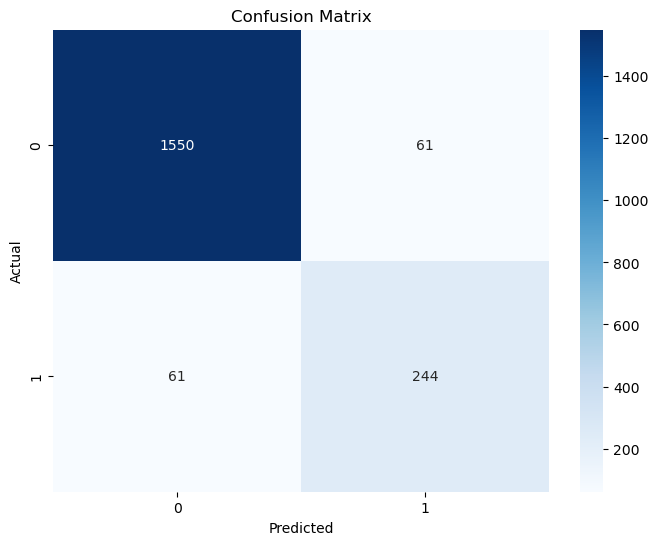

RNN Metrics:
AUC: 0.8810676598386096
Accuracy: 0.9363256784968684
Precision: 0.9363256784968684
Recall: 0.9363256784968684
Specificity: 0.8258096411803507
F1 Score: 0.9363256784968684
RNN Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1611
           1       0.80      0.80      0.80       305

    accuracy                           0.94      1916
   macro avg       0.88      0.88      0.88      1916
weighted avg       0.94      0.94      0.94      1916

----------------------------------
1550 61 61 244
pod:  0.8
pof:  0.03786468032278088
AUC:  0.8810676598386096
accuracy:  0.9363256784968684
precision:  0.8
recall:  0.8
specificity:  0.9621353196772191
F1:  0.8000000000000002


In [26]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialize RNN:
model = Sequential()

#Adding the first RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))

#Adding the output layer
model.add(Dense(units = 1))

#Compile the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Predict on the test set
y_pred_step1 = model.predict(x_test)
y_pred=y_pred_step1.round()


# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("RNN Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("RNN Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'aWOE', 'RNN-1', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


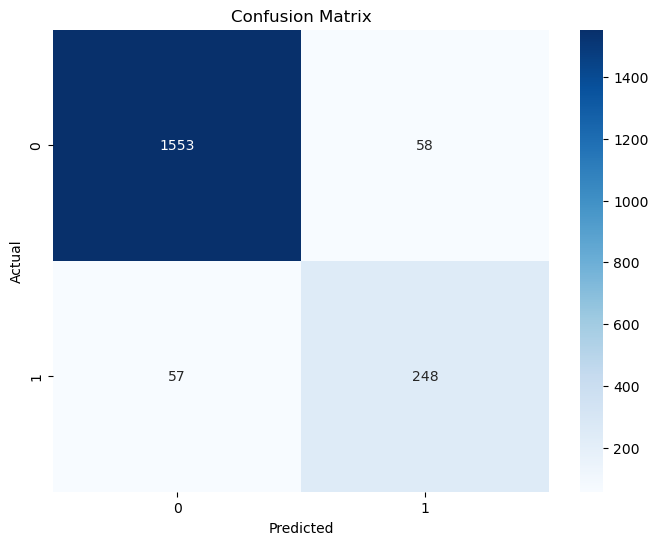

ExtraTreesClassifier Metrics:
AUC: 0.8885561355842518
Accuracy: 0.9399791231732777
Precision: 0.9400595713762797
Recall: 0.9399791231732777
Specificity: 0.8371331479952258
F1 Score: 0.9400189229753432
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1611
           1       0.81      0.81      0.81       305

    accuracy                           0.94      1916
   macro avg       0.89      0.89      0.89      1916
weighted avg       0.94      0.94      0.94      1916

----------------------------------
1553 58 57 248
pod:  0.8131147540983606
pof:  0.03600248292985723
AUC:  0.8885561355842517
accuracy:  0.9399791231732777
precision:  0.8104575163398693
recall:  0.8131147540983606
specificity:  0.9639975170701428
F1:  0.8117839607201309


In [27]:
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)



print(et_clf.get_params())

et_clf.fit(x_train, y_train)
# Predict on the test set
y_pred = et_clf.predict(x_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("ExtraTreesClassifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("Classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'aWOE', 'ExtraTrees', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

C:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Decision Tree Classifier Accuracy: 0.9138830897703549
Random Forest Classifier Accuracy: 0.9410229645093946
Bagging Classifier with RF Tree Accuracy: 0.9431106471816284
Voting Classifier Accuracy: 0.925365344467641


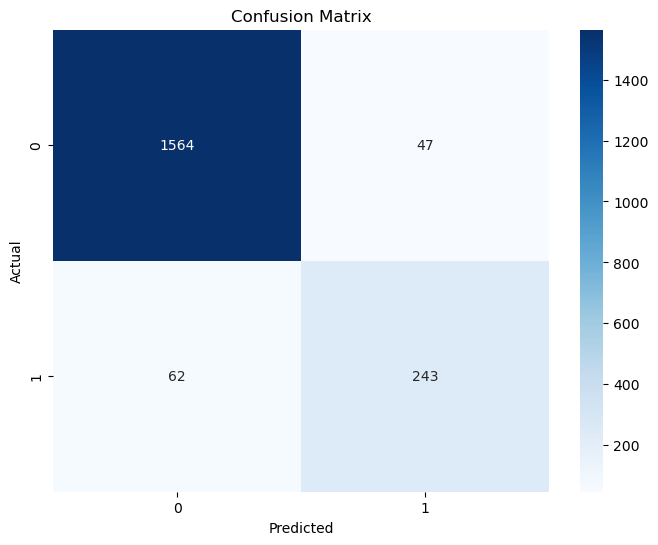

Bagging Classifier Metrics:
AUC: 0.8837734428264696
Accuracy: 0.9431106471816284
Precision: 0.942140355551565
Recall: 0.9431106471816284
Specificity: 0.8244362384713109
F1 Score: 0.9425253648623858
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1611
           1       0.84      0.80      0.82       305

    accuracy                           0.94      1916
   macro avg       0.90      0.88      0.89      1916
weighted avg       0.94      0.94      0.94      1916

----------------------------------
1564 47 62 243
pod:  0.7967213114754098
pof:  0.029174425822470516
AUC:  0.8837734428264696
accuracy:  0.9431106471816284
precision:  0.8379310344827586
recall:  0.7967213114754098
specificity:  0.9708255741775295
F1:  0.8168067226890757


In [28]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# Initialize base classifiers
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize Bagging classifier with Decision Tree as base estimator
bagging_dt_clf = BaggingClassifier(base_estimator=rf_clf, n_estimators=100, random_state=42)

# Initialize Voting classifier with Decision Tree and Random Forest as base estimators
voting_clf = VotingClassifier(estimators=[('dt', dt_clf), ('rf', rf_clf)], voting='hard')

# Train classifiers
dt_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)
bagging_dt_clf.fit(x_train, y_train)
voting_clf.fit(x_train, y_train)

# Make predictions
dt_predictions = dt_clf.predict(x_test)
rf_predictions = rf_clf.predict(x_test)
bagging_dt_predictions = bagging_dt_clf.predict(x_test)
voting_predictions = voting_clf.predict(x_test)

# Evaluate accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
bagging_dt_accuracy = accuracy_score(y_test, bagging_dt_predictions)
voting_accuracy = accuracy_score(y_test, voting_predictions)

print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Bagging Classifier with RF Tree Accuracy:", bagging_dt_accuracy)
print("Voting Classifier Accuracy:", voting_accuracy)


y_pred=bagging_dt_predictions

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Bagging Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("Classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)


List = ['Bank_loan_9578', 'aWOE', 'Bagging', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

C:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


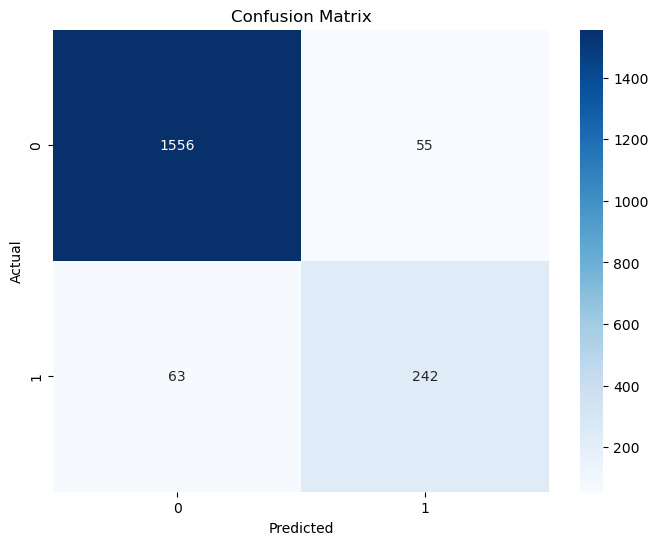

AdaBoost Classifier Metrics:
AUC: 0.8796511687069429
Accuracy: 0.9384133611691023
Precision: 0.9378026209771108
Recall: 0.9384133611691023
Specificity: 0.8208889762447837
F1 Score: 0.938080415905435
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1611
           1       0.81      0.79      0.80       305

    accuracy                           0.94      1916
   macro avg       0.89      0.88      0.88      1916
weighted avg       0.94      0.94      0.94      1916

----------------------------------
1556 55 63 242
pod:  0.7934426229508197
pof:  0.03414028553693358
AUC:  0.879651168706943
accuracy:  0.9384133611691023
precision:  0.8148148148148148
recall:  0.7934426229508197
specificity:  0.9658597144630664
F1:  0.8039867109634552


In [29]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

 
# Initialize base estimator (Decision Tree)
dt_clf = DecisionTreeClassifier(max_depth=1, random_state=42)

rf_clf = RandomForestClassifier(max_depth=100, random_state=42)

svm_clf = SVC(random_state=42)


# Initialize AdaBoost classifier
adaboost_clf = AdaBoostClassifier(base_estimator=rf_clf, n_estimators=100, random_state=42)
#adaboost_clf = AdaBoostClassifier(algorithm="SAMME", n_estimators=100, random_state=42)


# Train AdaBoost classifier
adaboost_clf.fit(x_train, y_train)

# Make predictions
adaboost_predictions = adaboost_clf.predict(x_test)

y_pred=adaboost_predictions

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("AdaBoost Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("Classification Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)


List = ['Bank_loan_9578', 'aWOE', 'AdaBoost', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

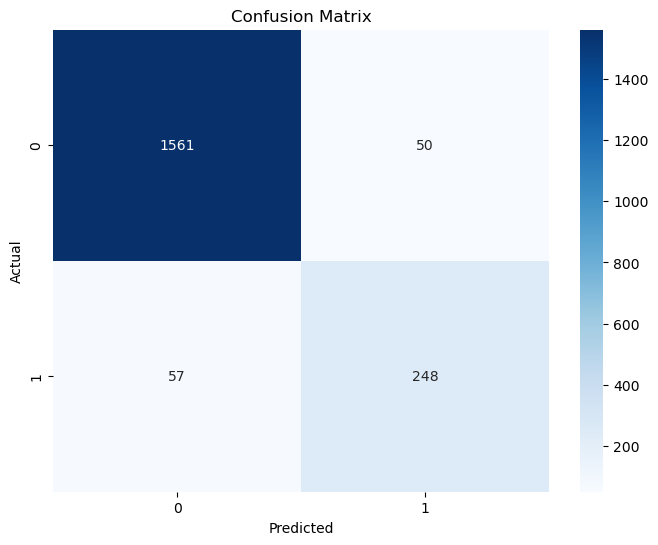

Voting ensemble Classifier Metrics:
AUC: 0.8910390654414833
Accuracy: 0.9441544885177453
Precision: 0.9436702004683513
Recall: 0.9441544885177453
Specificity: 0.8379236423652211
F1 Score: 0.9438908762107281
Classifier Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1611
           1       0.83      0.81      0.82       305

    accuracy                           0.94      1916
   macro avg       0.90      0.89      0.89      1916
weighted avg       0.94      0.94      0.94      1916

----------------------------------
1561 50 57 248
pod:  0.8131147540983606
pof:  0.031036623215394164
AUC:  0.8910390654414833
accuracy:  0.9441544885177453
precision:  0.8322147651006712
recall:  0.8131147540983606
specificity:  0.9689633767846059
F1:  0.8225538971807629


In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual classifiers
nb_clf = GaussianNB()
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
logistic_reg = LogisticRegression(random_state=42)
svm_classifier = SVC(random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Create an ensemble of classifiers using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('xgb_classifier', xgb_classifier), 
    ('logistic_reg', logistic_reg)
], voting='hard')  # 'hard' for majority vote

# Train the ensemble model
ensemble_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = ensemble_classifier.predict(x_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, specificity, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
specificity=specificity_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Voting ensemble Classifier Metrics:")
print("AUC:", auc) 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1) 


# Print the classification report
print("Classifier Report:\n", classification_rep)


print('----------------------------------')
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

pod=tp/(tp+fn)
print('pod: ',pod)

pof=fp/(fp+tn)
print ('pof: ',pof)

auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy_val=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy_val)

precision_val=tp/(tp+fp)  
print ('precision: ',precision_val)
 
recall_val = tp / (tp + fn)
print ('recall: ',recall_val)

specificity_val=tn/(fp+tn)
print ('specificity: ',specificity_val)

F1_val=(2*precision_val*recall_val)/(precision_val+recall_val)
print ('F1: ',F1_val)

List = ['Bank_loan_9578', 'aWOE', 'Voting', round(auc,3), round(accuracy,3), round(specificity_val,3), round(precision,3), round(recall,3),round(f1,3)]
with open('RESULT_FROM_PGROGRAM_Bank_loan_9578.csv', 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(List)
 
    # Close the file object
    f_object.close()

In [31]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual classifiers
nb_clf = GaussianNB()
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
logistic_reg = LogisticRegression(random_state=42)
svm_classifier = SVC(random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)


nb_clf.fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
random_forest.fit(x_train, y_train)
logistic_reg.fit(x_train, y_train)
svm_classifier.fit(x_train, y_train)
knn_classifier.fit(x_train, y_train)

# Make predictions
nb_predictions = nb_clf.predict(x_test)
dt_predictions = decision_tree.predict(x_test)
rf_predictions = random_forest.predict(x_test)
lr_predictions=logistic_reg.predict(x_test)
svm_predictions=svm_classifier.predict(x_test)
knn_predictions=knn_classifier.predict(x_test)
# Define weights for classifiers
nb_weight = 0.2
dt_weight = 0.0
rf_weight = 0.0
lr_weight = 0.3
svm_weight = 0.4
knn_weight = 0.1

# Ensemble prediction with weighted average
ensemble_predictions = (lr_weight * lr_predictions) + (nb_weight * nb_predictions)+(svm_weight*svm_predictions)+(knn_weight*knn_predictions)
ensemble_predictions = [1 if pred >= 0.5 else 0 for pred in ensemble_predictions]

# Evaluate accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(ensemble_accuracy)

0.9431106471816284
